### Please read the 'Model Test' section in `verifyml/DEVELOPMENT.md` before going through this notebook.

Toy example that shows how a new model test can be created and used.

In [6]:
"""ListLength test - test passed if the length of a given list is greater than a specified threshold"""

from __future__ import annotations
from dataclasses import dataclass, field
import matplotlib.pyplot as plt

# relative imports can also be used if this is saved as a standalone file
from verifyml.model_tests.ModelTest import ModelTest
from verifyml.model_tests.utils import plot_to_str     # converts plots to base64-encoded strings

@dataclass
class ListLength(ModelTest):
    """ A test to check that a given list contains more elements than a specified threshold. """

    input_list: list[int]
    threshold: int

    # optional: stores plots to be displayed on the Model Card
    plots: dict[str, str] = field(repr=False, default_factory=dict)

    # optional
    test_name: str = 'A list length test'
    test_desc: str = 'A list length test description'

    def plot(self, save_plots: bool = True) -> None:
        """Plot the input list with matplotlib and save it as a base64
        encoded string if save_plots is True.
        """
        fig, ax = plt.subplots()
        
        # show the plot
        ax.plot(self.input_list)

        # optionally save the plot to the instance
        if save_plots:
            self.plots['my plot name'] = plot_to_str()


    def run(self) -> bool:
        """Runs test by checking if len(input_list) > threshold"""
        self.result = len(self.input_list)
        self.passed = self.result > self.threshold

        return self.passed

## Demo Model Card that uses the newly defined test above

### Init 2 ListLength tests - 1 that passes, 1 that fails

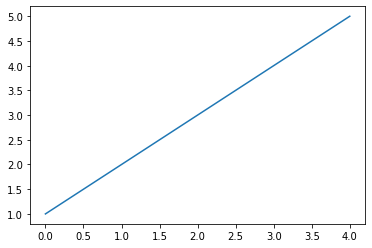

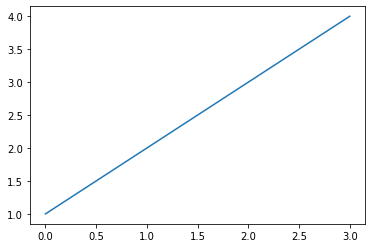

In [12]:
# set threshold at 4 - tests only pass if list length > 4
threshold = 4

input_list_pass = [1, 2, 3, 4, 5]
input_list_fail = [1, 2, 3, 4]

list_length_test_pass = ListLength(input_list_pass, threshold)
list_length_test_fail = ListLength(input_list_fail, threshold)

# run tests and plot results, saving the plots in the process
list_length_test_pass.run()
list_length_test_fail.run()

list_length_test_pass.plot()
list_length_test_fail.plot()

### Create a Model Card and attach the tests to it

In [13]:
import verifyml.model_card_toolkit as mctlib

# init model card toolkit and model card
mct = mctlib.ModelCardToolkit()
mc = mct.scaffold_assets()

# init model card test objects that will hold the tests
mc_test_pass, mc_test_fail = mctlib.Test(), mctlib.Test()

# assign the list length tests to them
mc_test_pass.read_model_test(list_length_test_pass)
mc_test_fail.read_model_test(list_length_test_fail)

# create a fairness report with these as fairness tests
fairness_report = mctlib.FairnessReport(
    type="Fairness report containing list length tests",
    tests=[mc_test_pass, mc_test_fail]
)

# add the report into the model card
mc.fairness_analysis.fairness_reports = [fairness_report]

# update the model card's name
mc.model_details.name = "demo model"

# update the model card assets with this new information
mct.update_model_card(mc)

### Export Model Card HTML into a file and also display it

In [14]:
from IPython import display

html = mct.export_format(output_file="list_length.html")

display.display(display.HTML(html))